In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\dolin\AppData\Local\Temp\ipykernel_29468\3388430375.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def midval(a, b, c):
    maxx = max(max(a,b), c)
    minn = min(min(a, b), c)
    
    return a + b + c - maxx - minn


def egalpcmd(ve):
    
    ialp = 7
    
    alpcmd=np.empty(ve.size, dtype=object)
    
    for i, v in enumerate(ve):
        if (v < const["valp"][ialp] and ialp > 0):
            print(v, ialp)
            ialp = ialp - 1

        alpcmd_i = const["calp0"][ialp] +  v*const["calp1"][ialp] +  v**2*const["calp2"][ialp]
        alpcmd[i] = alpcmd_i
    
    return alpcmd


def tal_egalpcmd(ve):
    
    ialp = 7
    
    alpcmd=np.empty(ve.size, dtype=object)
    
    for i, v in enumerate(ve):
        if (v < const["valptal"][ialp] and ialp > 0):
            print(v, ialp)
            ialp = ialp - 1

        alpcmd_i = const["calptal0"][ialp] +  v*const["calptal1"][ialp] +  v**2*const["calptal2"][ialp]
        alpcmd[i] = alpcmd_i
    
    return alpcmd

def aclam(ve):
    return min(const['dlallm'], const['aclam1'] + const['aclam2'] * ve)
    
def aclim(ve):
    return midval(const['aclim1'], const['aclim2'], const['aclim3'] + const['aclim4'] * ve)

In [51]:
const = {}

const['dlallm'] = 45
const['aclam1'] = 9
const['aclam2'] = 3.3e-3
const['aclim1'] = 37
const['aclim2'] = 10
const['aclim3'] = -19.5
const['aclim4'] = 2.5e-3
const["valp"] = [0, 500, 7500, 8500, 18000, 19000, 22000, 23000]
const["calp0"] = [5, 5.385, -77.44, 30, 350.4, -16.25, -646.55, 40]
const["calp1"] = [0, 0.003077, 0.02522, 0, -0.0358, 0.0025, 0.05975, 0]
const["calp2"] = [0, 0, -0.148e-5, 0, 0.1e-5, 0, -0.13e-5, 0]

const["valptal"] = [0, 500, 7500, 8500, 17500, 18500, 20000, 21000]
const["calptal0"] = [5, 5.385, -77.44, 30, 826.25, -63.6, -1103.6, 43]
const["calptal1"] = [0, 0.003077, 0.02522, 0, -0.091, 0.0052, 0.1092, 0]
const["calptal2"] = [0, 0, -0.148e-5, 0, 2.6e-6, 0, -2.6e-6, 0]


22990 7
21990 6
18990 5
17990 4
8490 3
7490 2
490 1
20990 7
19990 6
18490 5
17490 4
8490 3
7490 2
490 1


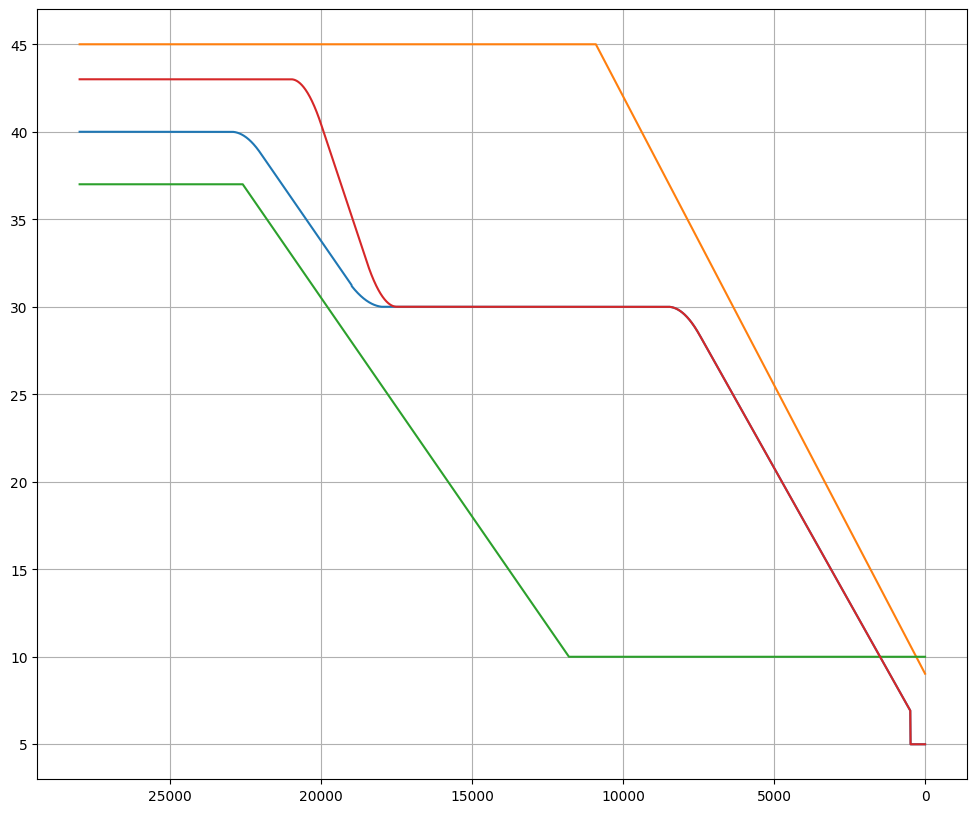

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt_ = ax

ialp = 9

ve = np.arange(28000, 0, -10)


alpcmd = egalpcmd(ve)
tal_alpcmd = tal_egalpcmd(ve)
aclam_ = [aclam(v_) for v_ in ve]
aclim_ = [aclim(v_) for v_ in ve]

plt_.plot(ve, alpcmd)
plt_.plot(ve, aclam_)
plt_.plot(ve, aclim_)
plt_.plot(ve, tal_alpcmd)


plt_.grid();


plt_.invert_xaxis()